In [119]:
!pip install spacy

In [120]:
!python -m spacy download en_core_web_sm

2022-12-03 12:04:02.097984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-03 12:04:02.098147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 12:05:09.850266: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-12-03 12:05:09.850368: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 12:05:09.942698: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-LDBQ8LL
2022-12-03 12:05:09.943124: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-LDBQ8LL



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [121]:
!pip install WordCloud

In [122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [123]:
df = pd.read_csv("Elon_musk.csv",encoding='Latin-1')
df.drop(['Unnamed: 0'],inplace=True , axis=1)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [124]:
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df[0:15]  

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler']

In [125]:
# Joining the list into one string/text
text = ' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [126]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [127]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50]) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [128]:
len(text_tokens) 

21078

In [129]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [130]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [131]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [132]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [133]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [134]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [135]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [136]:
print(vectorizer.vocabulary_)

{'kunalb11': 2712, 'alien': 232, 'idaacarmack': 2449, 'ray': 3627, 'trace': 4508, 'cyberpunk': 968, 'hdr': 1686, 'nextlevel': 3164, 'have': 1680, 'try': 4544, 'joerogan': 2632, 'spotify': 4125, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1121, 'underestimate': 4677, 'teslacn': 4353, 'congratulations': 863, 'tesla': 4347, 'china': 746, 'amazing': 258, 'execution': 1335, 'last': 2731, 'year': 4949, 'now': 3204, 'next': 3163, 'even': 1307, 'happy': 1667, 'new': 3160, 'ox': 3320, 'httpstco9wfkmyu2oj': 1875, 'frodo': 1503, 'underdoge': 4676, 'all': 235, 'thought': 4432, 'would': 4925, 'fail': 1371, 'himself': 1730, 'httpstcozgxjfdzzrm': 2408, 'owensparks': 3317, 'flcnhvy': 1445, 'anonyx10': 287, 'haha': 1653, 'thank': 4390, 'indeed': 2498, 'tweets': 4567, 'definitely': 1023, 'represent': 3711, 'realworld': 3652, 'time': 4451, 'allocation': 237, 'the': 4398, 'entertaining': 1263, 'outcome': 3296, 'likely': 2792, 'givedirectly': 1590, 'just': 2660, 'send': 3898, 'agree': 201, '

In [137]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [138]:
print(X.toarray().shape) 

(15795, 4983)


In [139]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [140]:
#TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [141]:
#Generate wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

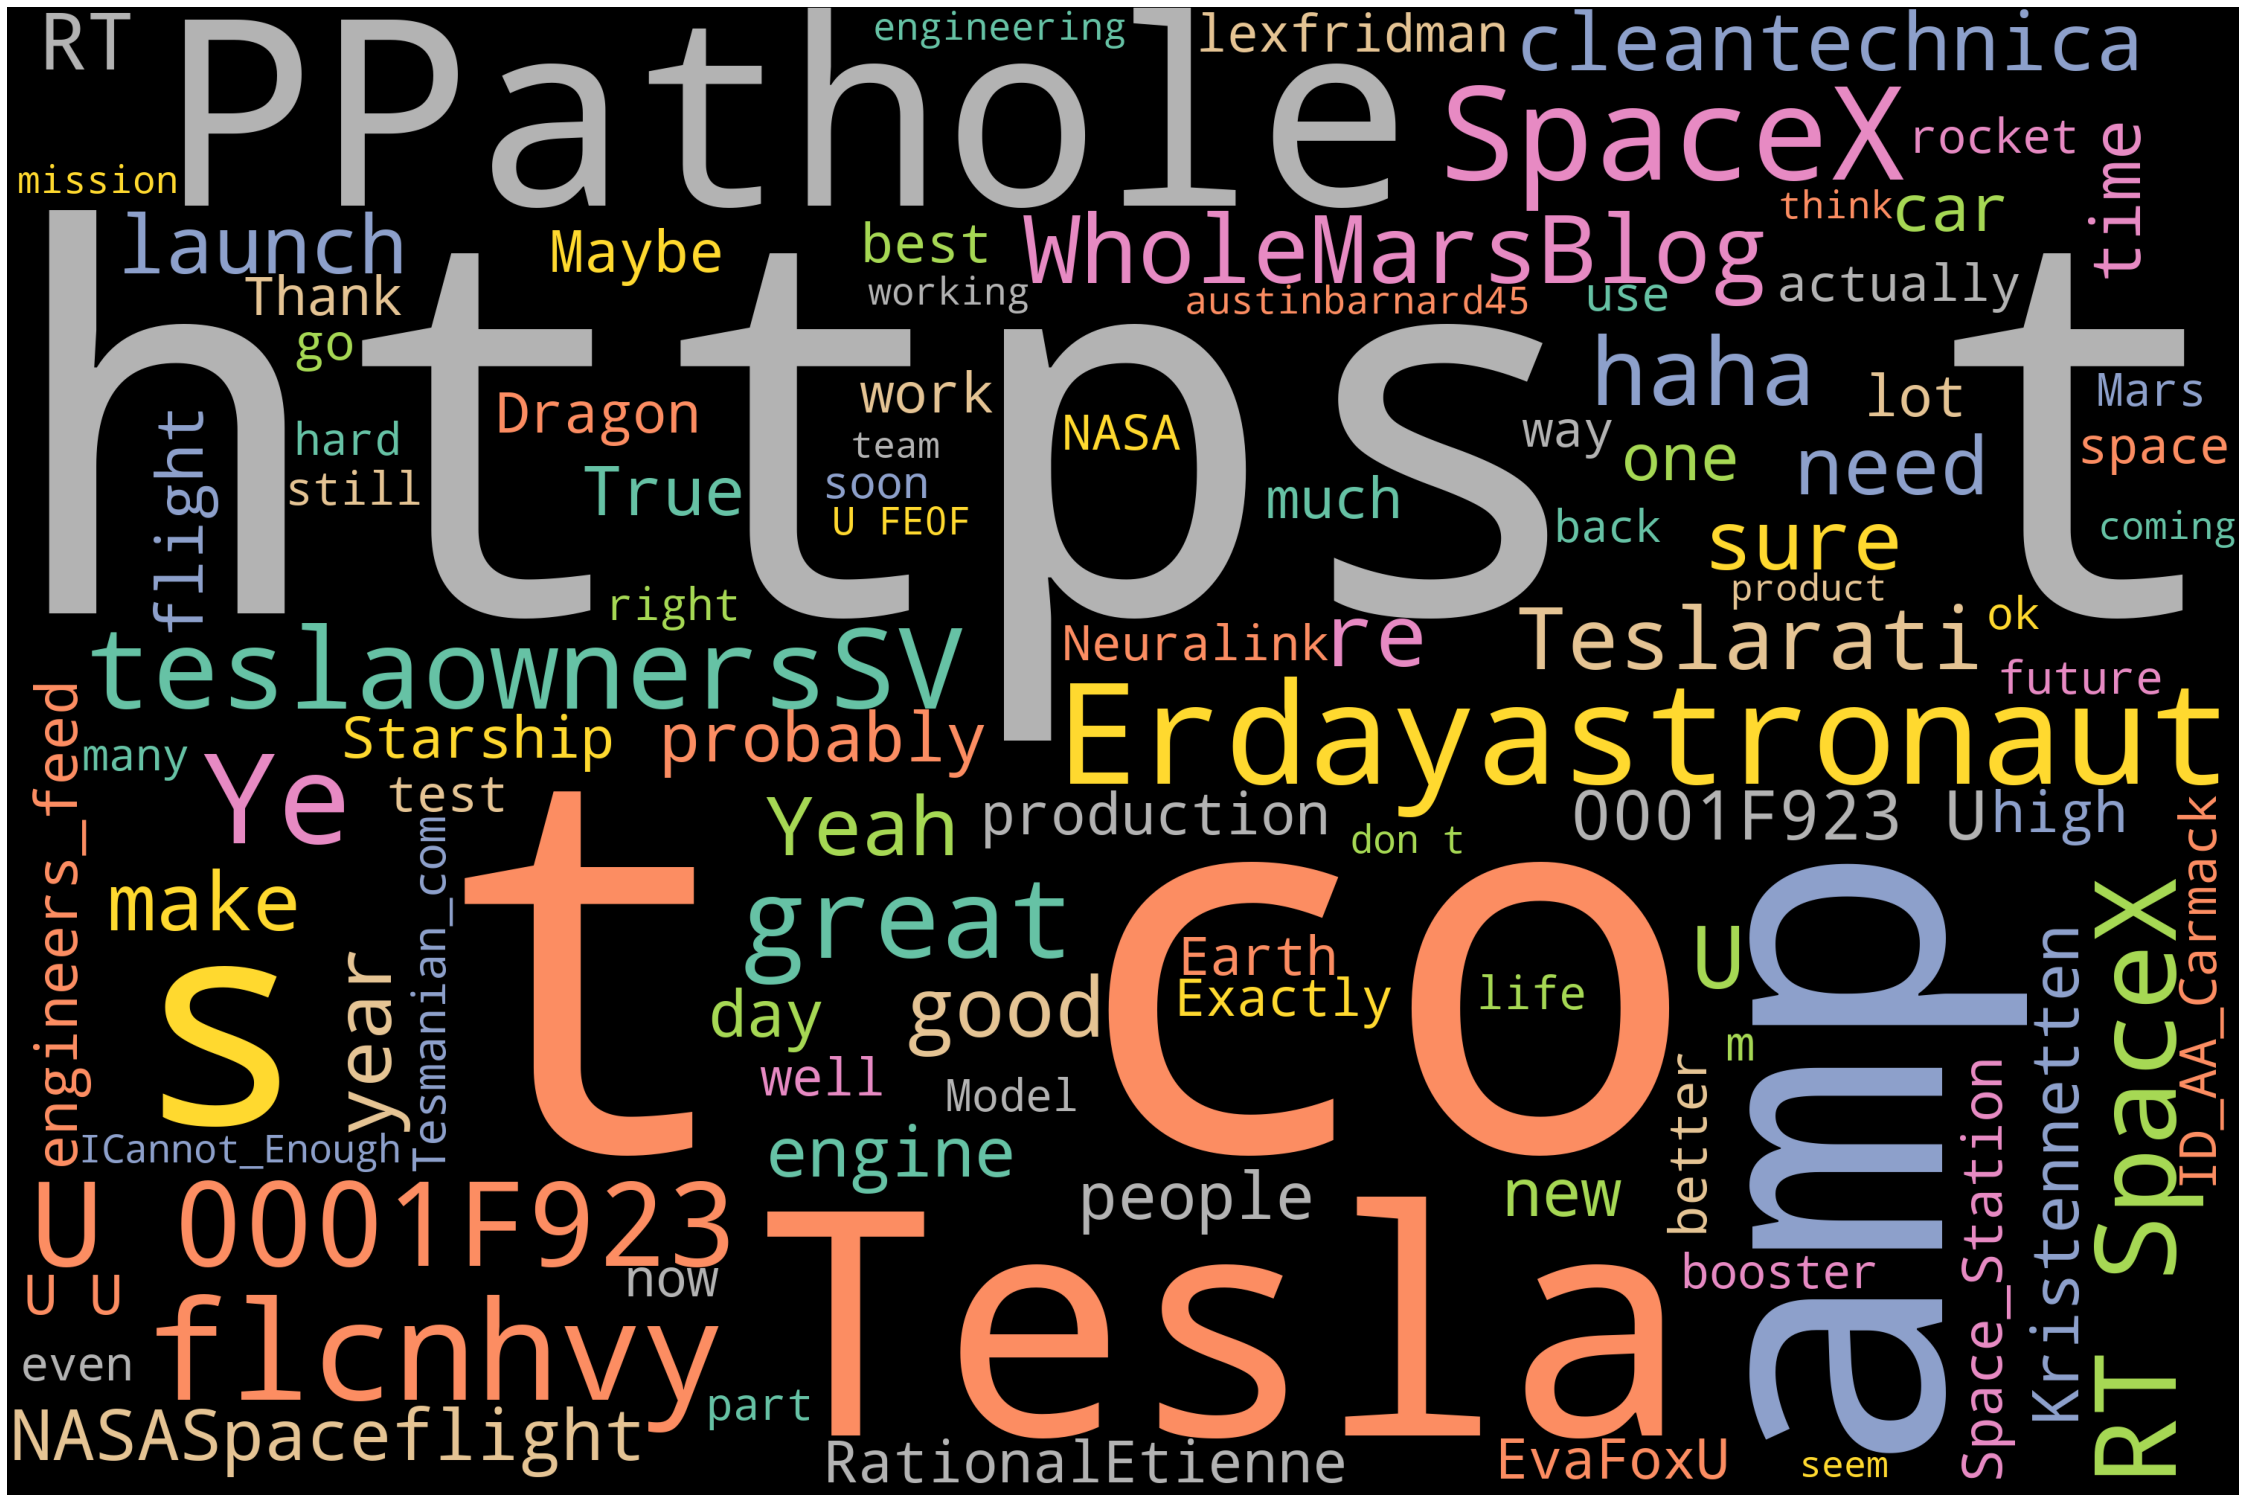

In [142]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Sentiment analysis

In [210]:
df1 = pd.read_csv("Elon_musk.csv",encoding='Latin-1')
df1.drop(['Unnamed: 0'],inplace=True , axis=1)
df1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [211]:
df1.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [213]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
df=pd.read_csv("Elon_musk.csv",encoding='Latin-1')
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False 

In [214]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[5:50]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [209]:
text_df = pd.DataFrame(sentences, columns=['text'])
text_df

,text
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [230]:
affinity_scores = text_df.set_index('text').to_dict() 
affinity_scores

{}

In [231]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [220]:
# test that it works
calculate_sentiment(text = 'tweets')

0

In [237]:
!pip install -U textblob

In [238]:
from textblob import TextBlob

In [239]:
text_df['text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                   (1.0, 0.75)
3    (0.30000000000000004, 0.48333333333333334)
4                              (0.390625, 0.25)
Name: text, dtype: object

In [252]:
text_df['sentiment'] = text_df['text'].apply(lambda x: TextBlob(x).sentiment[0] )
text_df[['text','sentiment']]

,text,sentiment
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,-0.250000
1,Have you tried it?,0.000000
2,@joerogan @Spotify Great interview!,1.000000
3,@gtera27 Doge is underestimated @teslacn Congr...,0.300000
4,Now on to the next for even more!!,0.390625
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0.000000
920,"It may never pay out, as the stock cant b ht...",0.016667
921,Details Aug 28.,0.000000
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0.184524


C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

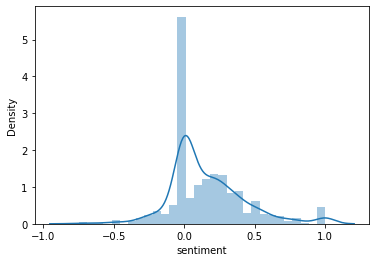

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(text_df['sentiment']) 

<AxesSubplot:xlabel='index', ylabel='sentiment'>

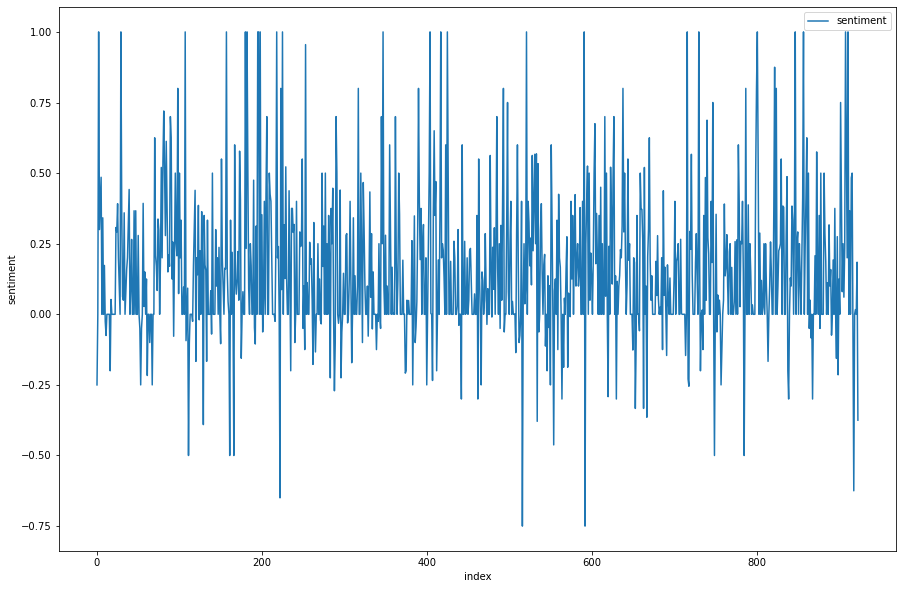

In [264]:
plt.figure(figsize=(15,10))
plt.xlabel('index')
plt.ylabel('sentiment')
sns.lineplot(data=text_df) 